<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [1]:
# a)
import numpy as np

def biased_8dice():
    faces = [1,2,3,4,5,6,7,8]
    ps = [face/sum(faces) for face in faces]
    while True:
        yield np.random.choice(faces, p=ps)

In [2]:
faces = [1,2,3,4,5,6,7,8]
ps = [face/sum(faces) for face in faces]
ps[6-1]/ps[2-1]

3.0

In [3]:
history = [next(biased_8dice()) for i in range(10000)]
len(history)

10000

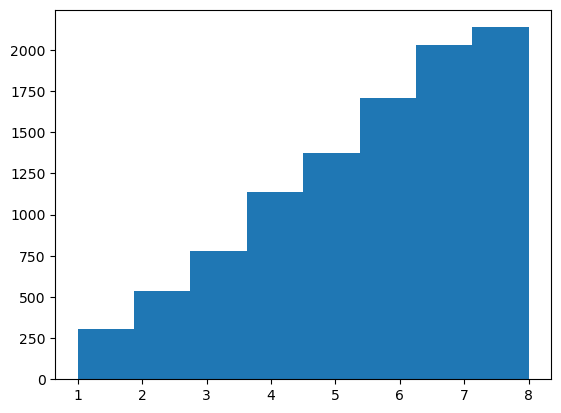

In [4]:
#b)
import matplotlib.pyplot as plt
plt.hist(history, bins = 8)
plt.show()

In [5]:
# c)

import time

def biased_8dice_timed():
    start = time.time()
    faces = [1,2,3,4,5,6,7,8]
    ps = [face/sum(faces) for face in faces]
    to_see = faces.copy()
    while len(to_see)>0:
        print(to_see)
        seen = np.random.choice(faces, p=ps)
        to_see.remove(seen) if seen in to_see else None
        yield seen
    return time.time() - start

In [7]:
b8_timed = biased_8dice_timed()

[next(b8_timed) for t in range(100)]

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 4, 5, 6, 7, 8]
[1, 2, 4, 5, 6, 8]
[1, 2, 4, 5, 8]
[1, 2, 4, 5]
[2, 4, 5]
[2, 4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]


StopIteration: 0.002000093460083008

### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [79]:
class Lift:
    def __init__(self, N_floors:int):
        if N_floors > 0:
            self.N_floors = N_floors # in the building
        else:
            raise ValueError("Number of floors in the building should be more than 0!")
        self.floor = 0
        self.passengers = dict()
        self.destinations = set()
        self.travel_history = [0]
        self.timed = 0
        self.stops = [0]*self.N_floors

    def receive_call(self, passenger_id:int, at_floor:int):
        self.destinations.add(at_floor)
        self.passengers[passenger_id] = {"at": at_floor, "want_to": None, "in_elevator": False}
        if at_floor >= self.N_floors or at_floor < 0:
            raise ValueError("Can not travel to non-existing floors!")
        
    def receive_destination(self, passenger_id:int, want_floor:int):
        self.destinations.add(want_floor)
        self.passengers[passenger_id]["want_to"] = want_floor
        self.passengers[passenger_id]["in_elevator"] = True 
        if want_floor >= self.N_floors or want_floor < 0:
            raise ValueError("Can not travel to non-existing floors!")

    def plot(self, history = False):
        import matplotlib.pyplot as plt

        if history:
            plt.plot(self.travel_history)
            plt.show()
        else:
            plt.plot([(0,self.floor), (self.N_floors, self.floor)], 'ro-')
            plt.show()
        
        print("_\n{0}#{1}\n_".format("|\n"*(self.N_floors-self.floor), "\n|"* (self.floor)))
    
    def travel(self):
        from numpy import argmax, argmin
        timed = 0
        consequtive = 5
        stopping = 10
        self.destinations = sorted(self.destinations)

        up = True if sum([x for x in self.destinations if self.floor < x])>len(self.destinations) else False
        if up:
            dist = [x - self.floor for x in self.destinations]
            travel_to = self.destinations[argmin(dist)]
            timed = (self.destinations[argmin(dist)] - self.floor - 1 ) * consequtive + stopping
        else:
            dist = [x - self.floor for x in self.destinations]
            travel_to = self.destinations[argmax(dist)]
            timed = (self.destinations[argmin(dist)] - self.floor - 1 ) * consequtive + stopping

        self.floor = travel_to
        self.destinations.remove(travel_to)

        for p_id in list(self.passengers.keys()):
            p = self.passengers[p_id]
            if p["want_to"] == travel_to and p["in_elevator"]:
                self.passengers.pop(p_id, None)

            if p["at"] == travel_to and not p["in_elevator"]:
                self.receive_destination(p_id, p["want_to"])

            self.timed += timed

    def simulate(self):
        from random import randint, sample
        passengers = list(zip(sample(range(0, 10), 10), [randint(0,self.N_floors-1) for y in range(10)], [randint(0,self.N_floors-1) for y in range(10)]))
        passenger_at_floor = [p[0] for p in passengers]
        passenger_at_floor.sort()
        for p in passengers:
            self.receive_call(p[0], p[1])
            self.receive_destination(p[0], p[2])

        while self.destinations:
            self.travel()
            self.travel_history.append(self.floor)
            self.stops[self.floor] += 1

        self.plot(history=True)
        return self.timed

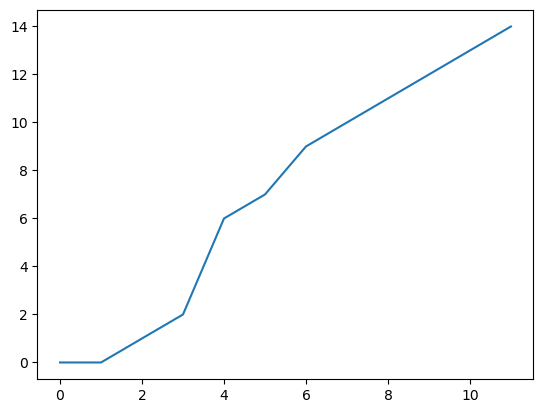

_
|
#
|
|
|
|
|
|
|
|
|
|
|
|
|
|
_


820

In [87]:
l = Lift(15)
l.simulate()


In [83]:
from random import randint, sample
maxi = 20
el = Lift(maxi)

passengers = list(zip(sample(range(0, 10), 10), [randint(0,maxi) for y in range(10)], [randint(0,maxi) for y in range(10)]))


In [84]:
for p in passengers:
    el.receive_call(p[0], p[1])
    el.receive_destination(p[0], p[2])

In [85]:
el.passengers

{1: {'at': 16, 'want_to': 12, 'in_elevator': True},
 7: {'at': 3, 'want_to': 6, 'in_elevator': True},
 8: {'at': 1, 'want_to': 19, 'in_elevator': True},
 9: {'at': 18, 'want_to': 11, 'in_elevator': True},
 5: {'at': 0, 'want_to': 12, 'in_elevator': True},
 6: {'at': 8, 'want_to': 18, 'in_elevator': True},
 3: {'at': 19, 'want_to': 0, 'in_elevator': True},
 0: {'at': 1, 'want_to': 9, 'in_elevator': True},
 2: {'at': 0, 'want_to': 18, 'in_elevator': True},
 4: {'at': 7, 'want_to': 18, 'in_elevator': True}}

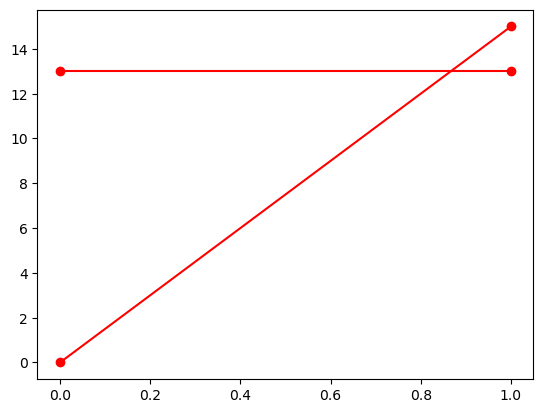

_
|
|
#
|
|
|
|
|
|
|
|
|
|
|
|
|
_


In [86]:
l.plot()

In [82]:
l.stops

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]